In [107]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os 
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import History
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, Activation, Average, Dense
from keras.losses import categorical_crossentropy
from keras.models import Sequential, Model, Input
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax
from keras import metrics
from keras.utils import to_categorical
from tensorflow.python.framework.ops import Tensor
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from typing import Tuple, List
import numpy as np
import os
from datetime import datetime
from matplotlib import pyplot
from keras.layers import LSTM 
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [106]:
!pip install keras

    100% |████████████████████████████████| 317kB 2.9MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 5.1MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 5.2MB/s ta 0:00:011
You are using pip version 9.0.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [76]:
path = '/Users/joannakang/Documents/Python_study'

In [77]:
train_path = os.path.join(path, 'complete_data.csv')
# 경로지정 Os.path library : 경로지정하는 라이브러리 -> 문자를 파라미터로 받음

In [87]:
train_df = pd.read_csv(train_path)

In [88]:
train_df.head()

,datetime,kWh,pressure,temperature,wind_direction,wind_speed
0,01/01/2017 00:00,NaN,30.19,46.0,230.0,10.0
1,01/01/2017 00:30,2310.732265,30.19,45.0,230.0,7.0
2,01/01/2017 01:00,2289.332265,30.16,45.0,230.0,6.0
3,01/01/2017 01:30,2314.583265,30.16,45.0,240.0,7.0
4,01/01/2017 02:00,2309.308265,30.13,45.0,240.0,10.0


In [89]:
train_df.count()
#비어있는 데이터가 있는 열의 갯수를 센다

datetime          35664
kWh               35663
pressure          35461
temperature       35461
wind_direction    32322
wind_speed        35444
dtype: int64

In [90]:
train_df = train_df.dropna()

In [91]:
train_df.count()

datetime          32321
kWh               32321
pressure          32321
temperature       32321
wind_direction    32321
wind_speed        32321
dtype: int64

In [92]:
train_df.head()

,datetime,kWh,pressure,temperature,wind_direction,wind_speed
1,01/01/2017 00:30,2310.732265,30.19,45.0,230.0,7.0
2,01/01/2017 01:00,2289.332265,30.16,45.0,230.0,6.0
3,01/01/2017 01:30,2314.583265,30.16,45.0,240.0,7.0
4,01/01/2017 02:00,2309.308265,30.13,45.0,240.0,10.0
5,01/01/2017 02:30,2315.057265,30.13,45.0,210.0,9.0


In [93]:
train_df = train_df[['kWh', 'pressure', 'wind_direction','wind_speed']]

In [94]:
train_df

,kWh,pressure,wind_direction,wind_speed
1,2310.732265,30.19,230.0,7.0
2,2289.332265,30.16,230.0,6.0
3,2314.583265,30.16,240.0,7.0
4,2309.308265,30.13,240.0,10.0
5,2315.057265,30.13,210.0,9.0
6,2331.782265,30.10,220.0,9.0
7,2320.183265,30.10,220.0,8.0
8,2308.883265,30.07,220.0,8.0
9,2306.232265,30.04,230.0,8.0
10,2262.758265,30.04,220.0,9.0


In [97]:
train_df = train_df[['kWh', 'pressure', 'wind_direction', 'wind_speed']]

In [98]:
train_df

,kWh,pressure,wind_direction,wind_speed
1,2310.732265,30.19,230.0,7.0
2,2289.332265,30.16,230.0,6.0
3,2314.583265,30.16,240.0,7.0
4,2309.308265,30.13,240.0,10.0
5,2315.057265,30.13,210.0,9.0
6,2331.782265,30.10,220.0,9.0
7,2320.183265,30.10,220.0,8.0
8,2308.883265,30.07,220.0,8.0
9,2306.232265,30.04,230.0,8.0
10,2262.758265,30.04,220.0,9.0


In [141]:
x_train = train_df[['pressure','wind_direction','wind_speed']][0:5000]
y_train = train_df['kWh'][0:5000]
x_val = train_df[['pressure','wind_direction','wind_speed']][5000:6000]
y_val = train_df['kWh'][5000:6000]
#여러개 지정할때는 []두개 넣기

In [135]:
x_train_df.count()

pressure          100
wind_direction    100
wind_speed        100
dtype: int64

In [136]:
x_train_df.describe()

,pressure,wind_direction,wind_speed
count,100.000000,100.000000,100.0000
mean,30.207500,226.300000,7.8900
std,0.168849,117.899589,1.9379
min,29.930000,10.000000,5.0000
25%,30.040000,220.000000,7.0000
50%,30.205000,240.000000,7.0000
75%,30.370000,322.500000,9.0000
max,30.400000,360.000000,17.0000


In [157]:
def deep_learning_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(10, activation="relu", input_shape=(x_size,)))
    t_model.add(BatchNormalization())
    t_model.add(Dense(7, activation="relu"))
    t_model.add(BatchNormalization())
    t_model.add(Dense(7, activation="relu"))
    t_model.add(Dense(y_size))
    print(t_model.summary())
    t_model.compile(loss='mean_squared_error',
        optimizer=Adam(lr=1e-3, decay=0.0),
        metrics=['accuracy'])
    return(t_model)

In [158]:
model = deep_learning_model_1(x_train.shape[1],1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                40        
_________________________________________________________________
batch_normalization_9 (Batch (None, 10)                40        
_________________________________________________________________
dense_15 (Dense)             (None, 7)                 77        
_________________________________________________________________
batch_normalization_10 (Batc (None, 7)                 28        
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 8         
Total params: 249
Trainable params: 215
Non-trainable params: 34
_________________________________________________________________
None


In [159]:
epochs = 30
batch_size =1000

print('Epochs: ', epochs)
print('Batch size: ', batch_size )

Epochs:  30
Batch size:  1000


In [160]:
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2, validation_data = (x_val, y_val))

Train on 5000 samples, validate on 1000 samples
Epoch 1/30
 - 1s - loss: 10315261.4000 - acc: 0.0000e+00 - val_loss: 8949405.0000 - val_acc: 0.0000e+00
Epoch 2/30
 - 0s - loss: 10314587.0000 - acc: 0.0000e+00 - val_loss: 8948664.0000 - val_acc: 0.0000e+00
Epoch 3/30
 - 0s - loss: 10313963.8000 - acc: 0.0000e+00 - val_loss: 8947977.0000 - val_acc: 0.0000e+00
Epoch 4/30
 - 0s - loss: 10313378.8000 - acc: 0.0000e+00 - val_loss: 8947370.0000 - val_acc: 0.0000e+00
Epoch 5/30
 - 0s - loss: 10312830.8000 - acc: 0.0000e+00 - val_loss: 8946799.0000 - val_acc: 0.0000e+00
Epoch 6/30
 - 0s - loss: 10312291.8000 - acc: 0.0000e+00 - val_loss: 8946242.0000 - val_acc: 0.0000e+00
Epoch 7/30
 - 0s - loss: 10311760.6000 - acc: 0.0000e+00 - val_loss: 8945688.0000 - val_acc: 0.0000e+00
Epoch 8/30
 - 0s - loss: 10311230.2000 - acc: 0.0000e+00 - val_loss: 8945132.0000 - val_acc: 0.0000e+00
Epoch 9/30
 - 0s - loss: 10310693.4000 - acc: 0.0000e+00 - val_loss: 8944554.0000 - val_acc: 0.0000e+00
Epoch 10/30
 - 0

In [161]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

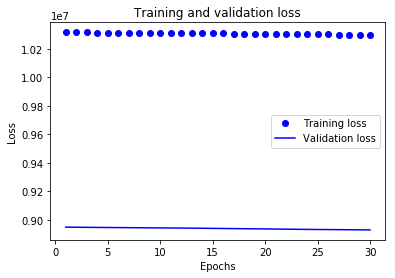

In [162]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()